In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* 1.1 Скачать данные по ссылке kc-house-data и laptop_price

In [6]:
df1 = pd.read_csv('./laptop_price.csv', encoding='cp1251')
df1.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


In [13]:
df = pd.read_csv('./kc-house-data.csv', encoding='cp1251')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


* 1.2 Изучите стоимости недвижимости

In [15]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 1.0, 'Price distribution')

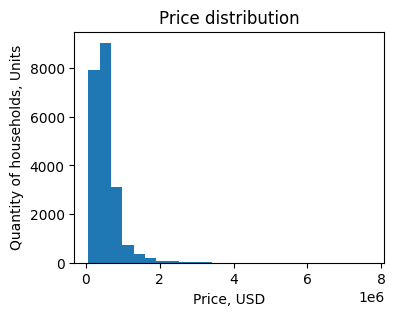

In [80]:
plt.figure(figsize=(4, 3))
plt.hist(df['price'], bins=25)
plt.xlabel('Price, USD')
plt.ylabel('Quantity of households, Units')
plt.title('Price distribution')
#plt.grid()

Text(0.5, 1.0, 'Price distribution')

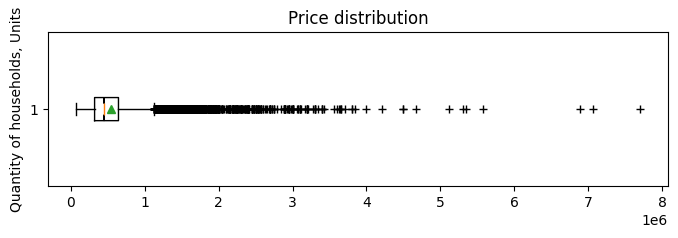

In [21]:
plt.figure(figsize=(8, 2))
plt.boxplot(df['price'], notch=1,sym='k+', vert=0,showmeans=True)
# notch=True выделение серидины узким местом
# vert=0 - горизонтальная свеча
# showmeans - показывать арифметическое средее
# plt.xlabel('Price, euros')
plt.ylabel('Quantity of households, Units')
plt.title('Price distribution')

* Вывод:
Цена изменяется от 21 тыс. долларов до 7 млн. долларов, средняя цена 540 тыс. долларов, при этом половина объектов в пределах от 320 до 645 тыс. долларов.

* 1.3 Изучите распределение квадратуры жилой площади

In [23]:
df['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

Text(0.5, 1.0, 'Living area distribution')

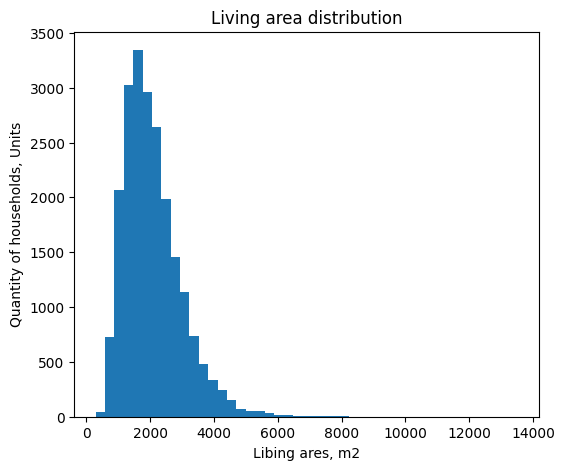

In [86]:
plt.figure(figsize=(6, 5))
plt.hist(df['sqft_living'], bins=45)
plt.xlabel('Libing ares, m2')
plt.ylabel('Quantity of households, Units')
plt.title('Living area distribution')
#plt.grid()

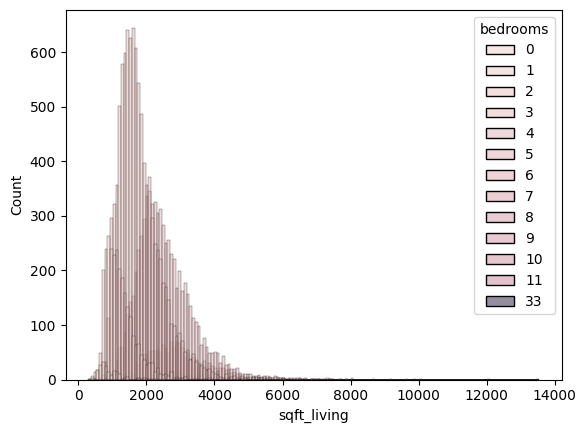

In [28]:
sns.histplot(data=df, x="sqft_living", hue="bedrooms");

* Вывод:
Площадь домов изменяется от 290 футов2 до 13 тыс. футов2, средняя площадь дома 2079 фута, при этом половина объектов в пределах от 1427 до 2550 футов2.

* 1.4 Изучите распределение года постройки


In [87]:
df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [32]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

<Axes: xlabel='yr_built', ylabel='Count'>

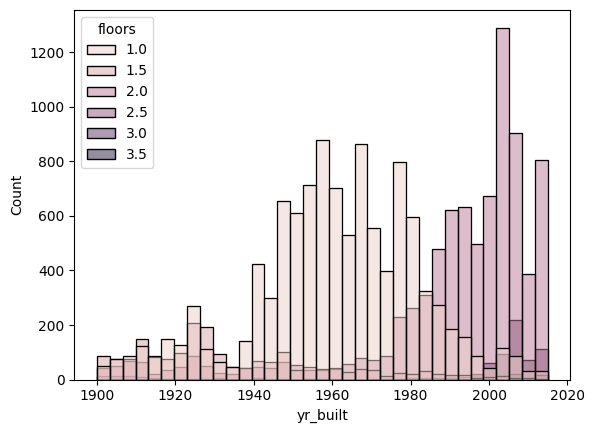

In [82]:
sns.histplot(df, x="yr_built", hue='floors')

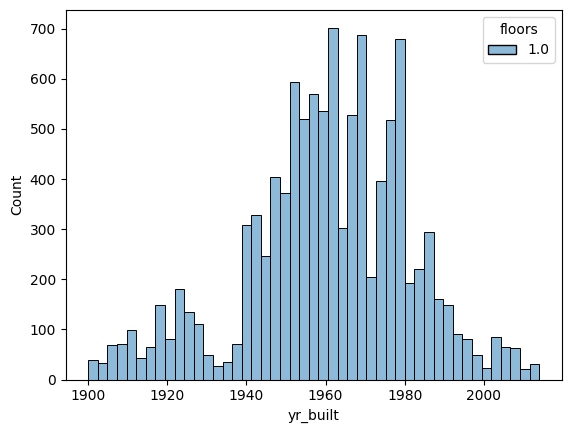

In [83]:
sns.histplot(df[df['floors'] ==1], x="yr_built", hue='floors');

<Axes: xlabel='yr_built', ylabel='Count'>

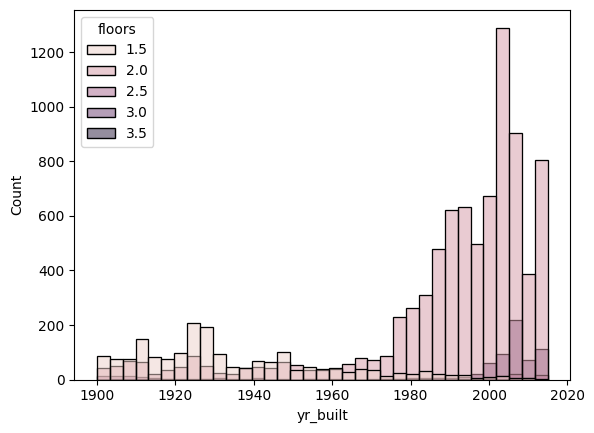

In [84]:
sns.histplot(df[df['floors'] >1], x="yr_built", hue='floors')

In [ ]:
dfsmall = df[['floors','yr_built']]
dfsmall

In [88]:
df['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

* Вывод:
Самый старый дом 1900 года постройки, самый молодой 2015 года, в среднем дома 1971 года постройки, при этом половина домов в пределах от 1951 до 1997 гг. Что характерно примерно с 1982 года количество многоэтажных домов становиться больше чем одноэтаржных.

* 2.1 Изучите распределение домов от наличия вида на набережную

In [90]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [92]:
df['waterfront'].describe()

count    21613.000000
mean         0.007542
std          0.086517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [107]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

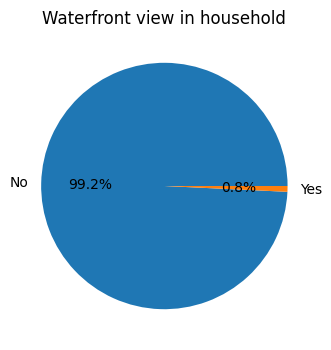

In [117]:
plt.figure(figsize=(4, 4))
plt.pie(df['waterfront'].value_counts().values, labels={'No','Yes'}, autopct="%.1f%%")
plt.title('Waterfront view in household')
plt.show()
#labels=df['waterfront'].value_counts().index

* Вывод:
Менее 1% процентра домов имеют вид на набережную

* 2.2 Изучите распределение этажей домов

In [108]:
df['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

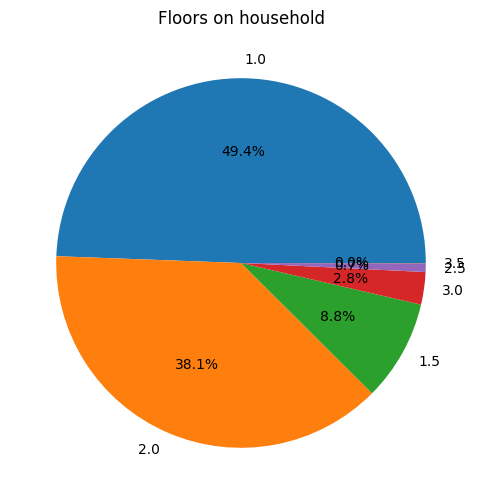

In [111]:
plt.figure(figsize=(6, 6))
plt.pie(df['floors'].value_counts().values, labels=df['floors'].value_counts().index, autopct="%.1f%%")
plt.title('Floors on household')
plt.show()

* Вывод:
Почти 50% процентра домов одноэтажные, 38% двухэтажые, максимальная этажность - 3,5 уровня.

* Изучите распределение состояния домов